# Getting started with neural networks: Classification and regression

## Define terms

* Sample/Input
* Prediction/Output
* Target
* Prediction Error/loss
* Classes
* Label
* Binary classification
* Multiclass Classification
* Multilabel classification
* Scalar/vector regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 4s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [13]:
# this is a test -4

# the king is dead and long live the new king - 10

# call out for a toss once more ace - 8


# #padding 
# 0 0 0  this is a test 0 0 0-4

# the king is dead and long live the new king - 10

# 0 call out for a toss once more ace 0- 8

# # 1 start of seq

# 0 0 1  this is a test 0 0 0-4

# the king is dead and long live the new king - 10

# 1 call out for a toss once more ace 0- 8


# # 2 is for unkown word

# 0 0 1  this is a test 0 0 0-4

# the king is dead and long live the new king - 10

# 1 call out for a toss once more ace 0- 8

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [19]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [21]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5146 - accuracy: 0.7925 - val_loss: 0.3982 - val_accuracy: 0.8581
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3077 - accuracy: 0.9040 - val_loss: 0.3040 - val_accuracy: 0.8897
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2227 - accuracy: 0.9268 - val_loss: 0.2850 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1765 - accuracy: 0.9415 - val_loss: 0.2821 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1436 - accuracy: 0.9533 - val_loss: 0.2805 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1190 - accuracy: 0.9620 - val_loss: 0.2962 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0984 - accuracy: 0.9699 - val_loss: 0.3083 - val_accuracy: 0.8846
Epoch 8/20
30

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

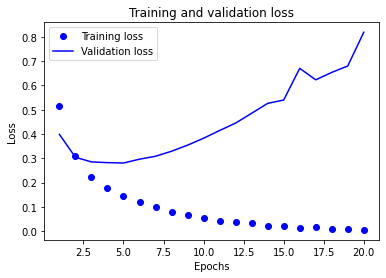

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

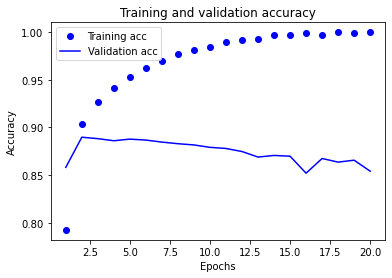

In [26]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [27]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4482 - accuracy: 0.8173
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2577 - accuracy: 0.9099
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1979 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2962 - accuracy: 0.8827


In [28]:
results

[0.2961820065975189, 0.8827199935913086]

### Using a trained model to generate predictions on new data

In [29]:
model.predict(x_test)

array([[0.17088428],
       [0.9988253 ],
       [0.705362  ],
       ...,
       [0.12670767],
       [0.07165799],
       [0.614381  ]], dtype=float32)

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 3s 1us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 1us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
train_labels[0]

3

### Preparing the data

**Encoding the input data**

In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [15]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [16]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [19]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [22]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 50ms/step - loss: 2.8094 - accuracy: 0.4881 - val_loss: 1.8847 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 0s 29ms/step - loss: 1.5140 - accuracy: 0.6936 - val_loss: 1.3478 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 0s 27ms/step - loss: 1.0931 - accuracy: 0.7661 - val_loss: 1.1287 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 0s 27ms/step - loss: 0.8535 - accuracy: 0.8234 - val_loss: 1.0296 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 0s 28ms/step - loss: 0.6760 - accuracy: 0.8652 - val_loss: 0.9532 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 0s 29ms/step - loss: 0.5408 - accuracy: 0.8929 - val_loss: 0.9164 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 0.4301 - accuracy: 0.9128 - val_loss: 0.8913 - val_accuracy: 0.8140
Epoch 8/20
16

**Plotting the training and validation loss**

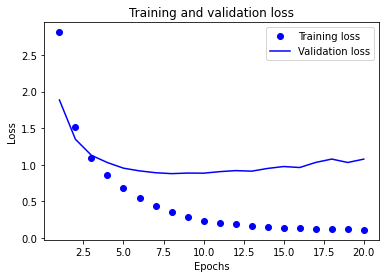

In [26]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

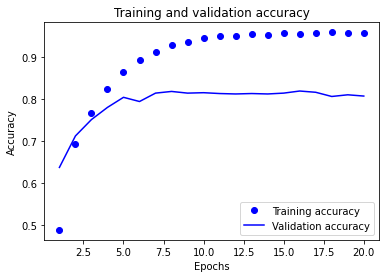

In [27]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [32]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=5,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
18/18 [==============================] - 1s 27ms/step - loss: 2.5327 - accuracy: 0.5222
Epoch 2/5
18/18 [==============================] - 0s 23ms/step - loss: 1.3430 - accuracy: 0.7189
Epoch 3/5
18/18 [==============================] - 0s 23ms/step - loss: 0.9996 - accuracy: 0.7936
Epoch 4/5
18/18 [==============================] - 0s 23ms/step - loss: 0.7881 - accuracy: 0.8329
Epoch 5/5
71/71 [==============================] - 0s 3ms/step - loss: 0.9901 - accuracy: 0.7774


In [29]:
results

[0.9843701124191284, 0.7804986834526062]

In [33]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1923419412288513

### Generating predictions on new data

In [34]:
predictions = model.predict(x_test)

In [35]:
predictions[0].shape

(46,)

In [36]:
np.sum(predictions[0])

0.99999994

In [37]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [38]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [39]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [40]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 18ms/step - loss: 3.0792 - accuracy: 0.2424 - val_loss: 2.3915 - val_accuracy: 0.5470
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 1.9520 - accuracy: 0.6254 - val_loss: 1.7341 - val_accuracy: 0.6280
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 1.5278 - accuracy: 0.6585 - val_loss: 1.5620 - val_accuracy: 0.6470
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 1.3735 - accuracy: 0.6606 - val_loss: 1.5075 - val_accuracy: 0.6320
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 1.2736 - accuracy: 0.6640 - val_loss: 1.4675 - val_accuracy: 0.6380
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 1.1941 - accuracy: 0.6694 - val_loss: 1.4463 - val_accuracy: 0.6440
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 1.1257 - accuracy: 0.6744 - val_loss: 1.4449 - val_accuracy: 0.6380
Epoch 8/20
63

In [41]:
# Dense network architecture


#
##
###
####
###
##
#

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [0]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [0]:
train_data.shape

In [0]:
test_data.shape

In [0]:
train_targets

### Preparing the data

**Normalizing the data**

### Building your model

**Model definition**

### Validating your approach using K-fold validation

**K-fold validation**

**Saving the validation logs at each fold**

**Building the history of successive mean K-fold validation scores**

**Plotting validation scores**

**Plotting validation scores, excluding the first 10 data points**

**Training the final model**

### Generating predictions on new data